# Visualizing the Chi-Square Distribution and Hypothesis Testing

This notebook visualizes the chi-square distribution and demonstrates hypothesis testing using a critical value approach. 

## Key Concepts:
- The chi-square distribution is commonly used in hypothesis testing, particularly for variance tests and categorical data analysis.
- The critical value is the threshold at which we reject the null hypothesis (H₀).
- The calculated chi-square value from the test statistic is compared to the critical value to make a decision.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Defining Parameters

We define the degrees of freedom (`df`) and significance level (`alpha`). 
These parameters are essential for determining the chi-square distribution and critical value.

In [2]:
# Parameters for the chi-squared distribution
df = 5  # Degrees of freedom
alpha = 0.05  # Significance level

## Calculating the Critical Value

The critical value is obtained using the inverse cumulative distribution function (percent-point function, `ppf`) of the chi-square distribution.

In [3]:
# Critical value for the chi-squared distribution
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"Critical Value: {critical_value:.2f}")

Critical Value: 11.07


## Example Test Statistic

We assume a calculated chi-square test statistic and compare it with the critical value.

In [4]:
# Example calculated value (should be > critical_value to reject H0)
calculated_value = 14
print(f"Calculated Value: {calculated_value}")

Calculated Value: 14


## Visualizing the Chi-Square Distribution

We plot the chi-square probability density function (PDF) and highlight the rejection region (tail area beyond the critical value).

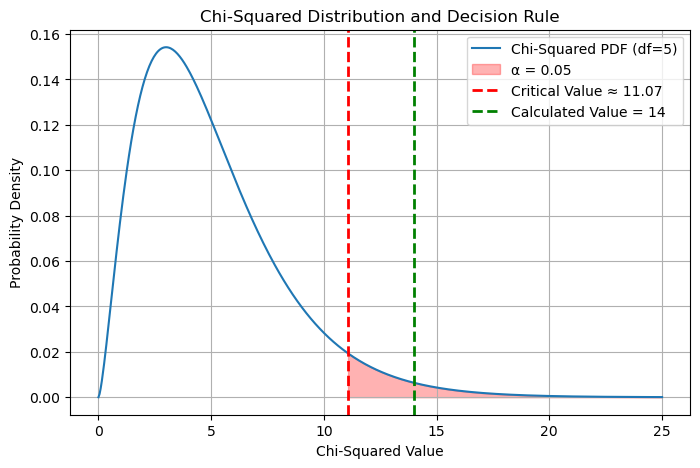

In [5]:
# x values for the chi-squared distribution
x = np.linspace(0, 25, 500)
y = stats.chi2.pdf(x, df)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'Chi-Squared PDF (df={df})')

# Fill area beyond critical value (tail area)
x_tail = np.linspace(critical_value, 25, 500)
y_tail = stats.chi2.pdf(x_tail, df)
plt.fill_between(x_tail, y_tail, color='red', alpha=0.3, label=f'α = {alpha}')

# Plot critical value line
plt.axvline(x=critical_value, color='red', linestyle='--', linewidth=2, label=f'Critical Value ≈ {critical_value:.2f}')
# Plot calculated value line
plt.axvline(x=calculated_value, color='green', linestyle='--', linewidth=2, label=f'Calculated Value = {calculated_value}')

plt.xlabel('Chi-Squared Value')
plt.ylabel('Probability Density')
plt.title('Chi-Squared Distribution and Decision Rule')
plt.legend()
plt.grid(True)
plt.show()

## Calculating the p-Value

The p-value is the probability of observing a test statistic as extreme as the calculated value under the null hypothesis. 
If the p-value is less than `alpha`, we reject the null hypothesis.

In [6]:
# Compute p-value
p_value = stats.chi2.sf(calculated_value, df)  # Survival function (1 - CDF)
print(f"p-value: {p_value:.4f}")

p-value: 0.0156


## Decision Rule

- If `calculated_value > critical_value`, we **reject** the null hypothesis.
- If `p_value < alpha`, we **reject** the null hypothesis.

Let's check our decision.

In [7]:
if calculated_value > critical_value:
    print("Reject the null hypothesis (H₀).")
else:
    print("Fail to reject the null hypothesis (H₀).")

if p_value < alpha:
    print("Reject the null hypothesis based on p-value.")
else:
    print("Fail to reject the null hypothesis (H₀) based on p-value.")

Reject the null hypothesis (H₀).
Reject the null hypothesis based on p-value.
